# Import Libraries

In [44]:
# Import necessary libraries
import csv
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from rembg import remove #removes the background from an image
from pathlib import Path
import os
import shutil
import os.path
import json
import seaborn as sns
import glob
import xml.etree.ElementTree as ET

import cv2
#from tensorflow.keras.models import load_model #***not sure what the issue here is but figure it out later.***
from imutils.contours import sort_contours
import imutils
#import cv2_imshow

In [45]:
pip list

Package                      Version            Editable project locationNote: you may need to restart the kernel to use updated packages.

---------------------------- ------------------ -------------------------
absl-py                      2.1.0
aiohttp                      3.9.5
aiosignal                    1.3.1
anaconda-anon-usage          0.4.3
anaconda-client              1.12.2
anaconda-cloud-auth          0.1.4
anaconda-navigator           2.5.2
antlr4-python3-runtime       4.9.3
anyio                        4.2.0
apex                         0.1
archspec                     0.2.1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.1.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.12.2
black                        24.1.0
bleach     

# Pre-Processing and exploratory analysis.

In [46]:
#Function to scroll through defined folder and remove any periods from the file name.

renamepicpath = 'C:/Users/adamb/Documents/Slapper_Tracker/More_pics/forannotator'

for directname, directnames, files in os.walk(renamepicpath):
    for f in files:
        # Split the file into the filename and the extension, saving
        # as separate variables
        filename, ext = os.path.splitext(f)
        if "." in filename:
            # If a '.' is in the name, rename, appending the suffix
            # to the new file
            new_name = filename.replace(".", "")
            os.rename(
                os.path.join(directname, f),
                os.path.join(directname, new_name + ext))



In [47]:
#Function to concatanate all three data frames Train/Test/Valid and then use them to plot the counts of each category

tensorpath=r"C:\Users\adamb\Documents\Slapper_Tracker\tensordata"

#creating a new directory called tensordata
Path(tensorpath).mkdir(parents=True, exist_ok=True)

#create three new folders in tensordata folder
testpath=os.path.join(tensorpath, 'test')
trainpath=os.path.join(tensorpath, 'train')
validpath=os.path.join(tensorpath, 'valid')

#load existing test data
testcsvpath=os.path.join(testpath, '_annotations.csv')
dftestexisting = pd.read_csv(testcsvpath)
print(dftestexisting.head(20))

#load existing train data
traincsvpath=os.path.join(trainpath, '_annotations.csv')
dftrainexisting = pd.read_csv(traincsvpath)
print(dftrainexisting.head(30))

#load existing test data
validcsvpath=os.path.join(validpath, '_annotations.csv')
dfvalidexisting = pd.read_csv(validcsvpath)
print(dfvalidexisting.head(20))

#concoctanate the three data frames

frames = [dftestexisting, dftrainexisting, dfvalidexisting]
dfallpics=pd.concat(frames)
dfallpics=dfallpics.reset_index(drop=True)
print(dfallpics)


                        filename class  width  height  xmin  ymin  xmax  ymax
0     PXL_20231213_005509321.jpg    HP    768    1024    68   236   741   742
1     PXL_20231214_004300604.jpg   RTB   1024     768   253    67   877   579
2     PXL_20231214_004458240.jpg   RTB   1024     768   218    74   843   703
3     PXL_20231213_005518658.jpg    HP    768    1024     6   176   763   774
4     PXL_20231213_005547886.jpg    HP    768    1024    64    81   755   918
5     PXL_20231213_005358868.jpg   RTB    768    1024    69   155   690   767
6     PXL_20231214_004437147.jpg   RTB   1024     768   216    73   845   703
7     PXL_20231230_160559210.jpg    HP   1024     768    41   170   728   589
8     PXL_20231230_160608312.jpg    HP   1024     768   224   182   771   534
9     PXL_20231230_160404579.jpg   RTB   1024     768   304    88   849   675
10    PXL_20231230_160428600.jpg   RTB   1024     768   340   113   807   582
11    PXL_20231230_160556623.jpg    HP   1024     768   122   16

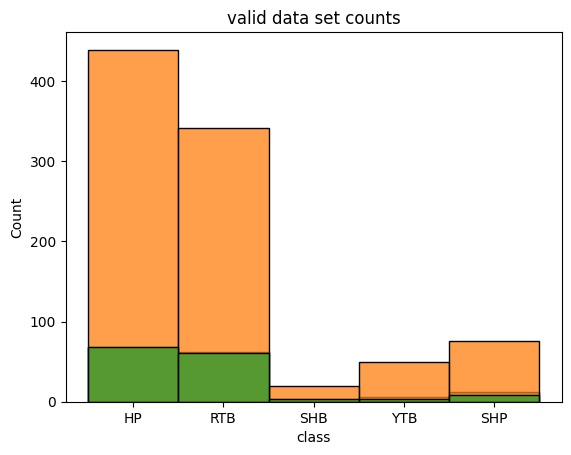

In [48]:
#show boxplot for each of the three data frames Train/Test/Valid

sns.histplot(data=dftestexisting,x='class').set(title='test data set counts')
sns.histplot(data=dftrainexisting,x='class').set(title='train data set counts')
sns.histplot(data=dfvalidexisting,x='class').set(title='valid data set counts')

plt.show()

In [49]:
dfallpics[dfallpics['filename'].duplicated() == True] #no duplicates, it's working

,filename,class,width,height,xmin,ymin,xmax,ymax
28,PXL_20240114_225615161MP.jpg,RTB,1024,768,449,216,461,230
29,PXL_20240114_225614049MP.jpg,RTB,1024,768,758,249,770,263
31,PXL_20240114_221012070.jpg,RTB,1024,768,496,320,509,332
32,PXL_20240114_225614049MP.jpg,RTB,1024,768,413,208,425,221
34,PXL_20240114_220433146MP.jpg,RTB,768,1024,166,417,190,441
...,...,...,...,...,...,...,...,...
1129,2024-02-07frame0.jpg,HP,1024,576,377,240,382,243
1130,2024-02-06frame100.jpg,HP,1024,576,507,250,515,255
1131,2024-02-07frame0.jpg,HP,1024,576,335,248,340,252
1191,frame2.jpg,HP,1024,576,427,279,442,287


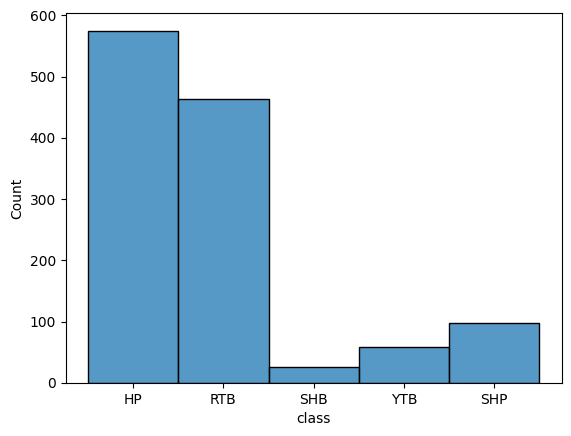

In [50]:
sns.histplot(data=dfallpics,x='class')
plt.show()


In [51]:
dfallpics['class'].value_counts()

class
HP     575
RTB    464
SHP     97
YTB     59
SHB     26
Name: count, dtype: int64

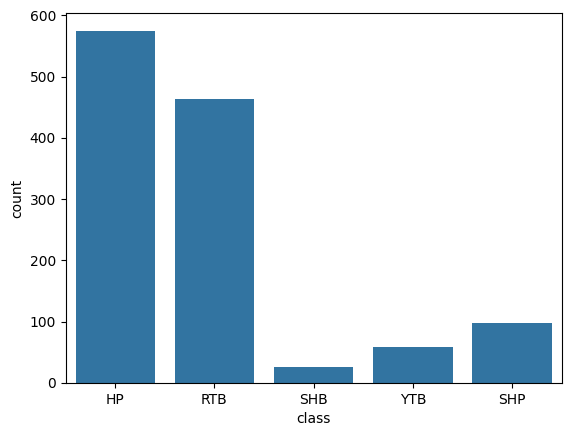

In [52]:
sns.countplot(data=dfallpics,x='class')
plt.show()

#add other items for labelling and formatting from data science course

# Functions for this program

In [53]:
#function to display image

def show_img(img):
  fig = plt.gcf()
  fig.set_size_inches(8, 4) #was 16 and 8
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [54]:
#test resizing images
#height is position 0 and width is position 1.  Need to determine which is bigger to use for resizing properly.

def resize_image(img, max_dim):

    #desired_max_dim = 1024
    desired_max_dim = max_dim #set max dimension to size image to.

    #determine which is larger width or height
    if img.shape[1] > img.shape[0]:
        aspect_ratio = img.shape[1]/img.shape[0]
        desired_height = int(desired_max_dim/aspect_ratio)
        resized_image = cv2.resize(img, (desired_max_dim, desired_height))
    
    else:
        aspect_ratio = img.shape[0]/img.shape[1]
        desired_width = int(desired_max_dim/aspect_ratio)
        resized_image = cv2.resize(img, (desired_width, desired_max_dim))

    #hstack = np.hstack((hockeytest, resized_image)) Doesn't work because they are different sizes.
    #show_img(img)
    #show_img(resized_image)
    #print(img.shape)
    #print(resized_image.shape)

    return resized_image

In [55]:
#Convert csv file to coco.json for detectron2 training.  Need to make a funciton.
#input is path to csv file and output is path to json file.

def create_json(csvpath, jsonpath): 

    path = csvpath # the path to the CSV file
    save_json_path = jsonpath

 
    data = pd.read_csv(path)

    images = []
    categories = []
    annotations = []

    category = {}
    category["supercategory"] = 'none'
    category["id"] = 0
    category["name"] = 'None'
    categories.append(category)

    data['fileid'] = data['filename'].astype('category').cat.codes
    data['categoryid']= pd.Categorical(data['class'],ordered= True).codes
    data['categoryid'] = data['categoryid']+1
    data['annid'] = data.index 

    def image(row):

        image = {}
        image["height"] = row.height
        image["width"] = row.width
        image["id"] = row.fileid
        image["file_name"] = row.filename

        return image

    def category(row):

        category = {}
        category["supercategory"] = 'None'
        category["id"] = row.categoryid #was categoryid 1/7/24
        category["name"] = row[2] #was row[2] 1/7/24

        return category

    def annotation(row):

        annotation = {}
        area = (row.xmax -row.xmin)*(row.ymax - row.ymin)
        annotation["segmentation"] = []
        annotation["iscrowd"] = 0 #this is sus causing errors.
        annotation["area"] = area
        annotation["image_id"] = row.fileid
        annotation["bbox"] = [row.xmin, row.ymin, row.xmax -row.xmin,row.ymax-row.ymin ]
        annotation["category_id"] = row.categoryid
        annotation["id"] = row.annid

        return annotation

    for row in data.itertuples():

        annotations.append(annotation(row))

    imagedf = data.drop_duplicates(subset=['fileid']).sort_values(by='fileid')

    for row in imagedf.itertuples():

        images.append(image(row))

    catdf = data.drop_duplicates(subset=['categoryid']).sort_values(by='categoryid')

    for row in catdf.itertuples():

        categories.append(category(row))

    data_coco = {}
    data_coco["images"] = images
    data_coco["categories"] = categories
    data_coco["annotations"] = annotations

    json.dump(data_coco, open(save_json_path, "w"), indent=4)

In [56]:
#function to concactonate dataframes and drop file paths and rename with filename in filepaths.

def conc_and_rename(dfexisting, dfnew):

#error handling-If file doesn't exist I don't want to do this.
    if 'filename' not in dfnew:
        frames = [dfexisting, dfnew]
        concattestdf=pd.concat(frames)
        concattestdf=concattestdf.reset_index(drop=True)
    else:
        dftest=dfnew.drop(['filepaths'], axis=1)#drop filepaths from df and 
        #dftest1=dftest.rename(columns={"file": "filepaths"})#rename file to filepaths
        test = dftest #was dftest1
        frames = [dfexisting, test]
        concattestdf=pd.concat(frames)
        concattestdf=concattestdf.reset_index(drop=True)

    concattestdf.head(20)

    return concattestdf


In [57]:
#function to pre-process images without displaying all of them

def pre_process1(img):
    
    #added 12/29/23 to enhance image for green portion of the ball issues.
    # converting to LAB color space
    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l_channel, a, b = cv2.split(lab)

    # Applying CLAHE to L-channel
    # feel free to try different values for the limit and grid size:
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l_channel)

    # merge the CLAHE enhanced L-channel with the a and b channel
    limg = cv2.merge((cl,a,b))

    # Converting image from LAB Color model to BGR color spcae
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    
    #adding this 12/28/23 to remove glare
    rgb_planes = cv2.split(enhanced_img)

    result_planes = []
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_planes.append(diff_img)
        result_norm_planes.append(norm_img)
    
    result = cv2.merge(result_planes)
    result_norm = cv2.merge(result_norm_planes)
    
    #remove the background of the picture
    no_background=remove(result_norm)
    
    #convert to gray
   
    gray = cv2.cvtColor(no_background, cv2.COLOR_BGR2GRAY)
  

    #blur
    
    blur = cv2.bilateralFilter(gray, 15, 100, 17) #default 11,17,17; when first number changed to 100, took a long time to run
    

    #threshold
    
    value, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    #test a couple more
    edged = cv2.Canny(thresh, 15, 50) #default 15,50
    #wide = cv2.Canny(thresh, 10, 200)
    #mid = cv2.Canny(thresh, 30, 150)
    #tight = cv2.Canny(thresh, 240, 250)

    
    
    #closing
    dilation = cv2.dilate(edged, np.ones((5,5), np.uint8))
    closing = cv2.erode(dilation, np.ones((5,5), np.uint8))
    

    #find contours
    conts = cv2.findContours(dilation.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sorted(conts, key=cv2.contourArea, reverse=True)[:8]

    # find the biggest countour (c) by the area
    c = max(conts, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
   

    # draw the biggest contour (c) in green
    trial=cv2.rectangle(dilation,(x,y),(x+w,y+h),(150,255,0),2)
    trial1=cv2.rectangle(img,(x,y),(x+w,y+h),(150,255,0),16)


    show_img(trial1)
    
    return x,y,w,h


In [58]:
#function to pre-process images

def pre_process(img):
    
    #need to add contrast portion to this.*****
    #added 12/29/23 to enhance image for green portion of the ball issues.
    # converting to LAB color space
    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l_channel, a, b = cv2.split(lab)

    # Applying CLAHE to L-channel
    # feel free to try different values for the limit and grid size:
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l_channel)

    # merge the CLAHE enhanced L-channel with the a and b channel
    limg = cv2.merge((cl,a,b))

    # Converting image from LAB Color model to BGR color spcae
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    print('enhanced image')
    show_img(enhanced_img)
    
    #adding this 12/28/23
    rgb_planes = cv2.split(enhanced_img)

    result_planes = []
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_planes.append(diff_img)
        result_norm_planes.append(norm_img)
    
    result = cv2.merge(result_planes)
    result_norm = cv2.merge(result_norm_planes)
    
    print('result')
    show_img(result)
    
    print('result norm')
    show_img(result_norm)
    
    #remove the background of the picture
    no_background=remove(result) #changed from img
    
    print('no background')
    show_img(no_background)
    
    #convert to gray
    print("**Gray**")
    gray = cv2.cvtColor(no_background, cv2.COLOR_BGR2GRAY) #no_background
    show_img(gray)

    #blur
    print("**Blur**")
    blur = cv2.bilateralFilter(gray, 15, 100, 17) #default 11,17,17; when first number changed to 100, took a long time to run
    show_img(blur)

    #threshold
    print("**Thresh**")
    value, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    show_img(thresh)
    print(value)

    #test a couple more
    edged = cv2.Canny(thresh, 15, 50) #default 15,50
    wide = cv2.Canny(thresh, 10, 200)
    mid = cv2.Canny(thresh, 30, 150)
    tight = cv2.Canny(thresh, 240, 250)

    print("**edged**")
    show_img(edged)
    print("**wide**")
    show_img(wide)
    print("**mid**")
    show_img(mid)
    print("**tight**")
    show_img(tight)
    
    #closing
    dilation = cv2.dilate(edged, np.ones((5,5), np.uint8))
    closing = cv2.erode(dilation, np.ones((5,5), np.uint8))
    print("**edged**")
    show_img(edged)
    print("**dilation**")
    show_img(dilation) #dilation looks good, need to remove some noise
    print("**closing**")
    show_img(closing)

    #find contours
    conts = cv2.findContours(dilation.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sorted(conts, key=cv2.contourArea, reverse=True)[:8]

    # find the biggest countour (c) by the area
    c = max(conts, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
    len(c)
    print(x,y,w,h)

    # draw the biggest contour (c) in green
    trial=cv2.rectangle(dilation,(x,y),(x+w,y+h),(150,255,0),2)
    trial1=cv2.rectangle(img,(x,y),(x+w,y+h),(150,255,0),16)


    show_img(trial)
    show_img(trial1)



In [59]:
#list files in directory that are .xml files

def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            filepath = root + os.sep + name
            if filepath.endswith(".xml"):
                r.append(os.path.join(root, name))
    return r

In [60]:
%%script echo skipping
imgtest = cv2.imread(r"C:\Users\adamb\Documents\Slapper_Tracker\Training_Pics\Hockey_Puck\PXL_20240107_220426821.jpg")

skipping


In [61]:
%%script echo skipping
tennistest = cv2.imread(r"C:\Users\adamb\Documents\Slapper_Tracker\More_pics\forannotator\PXL_20240107_220428701.jpg")
hockeytest = cv2.imread(r"C:\Users\adamb\Documents\Slapper_Tracker\More_pics\forannotator\PXL_20240114_124919902.jpg")


skipping


In [62]:
%%script echo skipping
pre_process1(tennistest)

skipping


In [63]:
%%script echo skipping
pre_process(hockeytest)

skipping


# Need to draw a boundary box

In [64]:
#create data frame to apply labels to folders

folder=["Hockey_Puck", "Red_Tennis_Ball"] # this is a list of the folders
labels=["HP","RTB"] # this is a list of the labels associated with each folder
Fseries=pd.Series(folder, name='folder')
Lseries=pd.Series(labels, name='labels')
df1=pd.concat([Fseries, Lseries], axis=1) # this is the data frame that should be like your csv file
print (df1.head(7))



            folder labels
0      Hockey_Puck     HP
1  Red_Tennis_Ball    RTB


# Build the data set for tensorflow and process images

In [65]:
#****pretty sure this can be deleted****************
#test to check if file exists, if it does don't do the rest.  Plan to implement below and
#then load and concat the dataframes for the CSV files to make it work.

testpath1='C:/Users/adamb/Documents/Slapper_Tracker/More_pics/PXL_20231230_160559210.jpg' #add r at the end
fpath1='C:/Users/adamb/Documents/Slapper_Tracker/More_pics/PXL_20231230_160559210.jpg'

#******Need to create three paths, train, test, valid.
#******Need function to separate the file name from path, then put path from above into file name to check all three folders.

#**************This is from CSV file portion below***************
tensorpath=r"C:\Users\adamb\Documents\Slapper_Tracker\tensordata"


#creating a new directory called tensordata
Path(tensorpath).mkdir(parents=True, exist_ok=True)

#create three new folders in tensordata folder
testpath=os.path.join(tensorpath, 'test')
trainpath=os.path.join(tensorpath, 'train')
validpath=os.path.join(tensorpath, 'valid')

#**split the file name from the path
image_to_find=os.path.basename(fpath1).split('.')[0] + '.' + os.path.basename(fpath1).split('.')[1]
testpath2=os.path.join(testpath, image_to_find)

#check if image is in test folder.  check_file produces True

check_file_test = os.path.isfile(testpath2) #need to add image name to testpath to work.

#if false then file doesn't exist and needs to be generated
if check_file_test == False:
    print(testpath2)
    print(check_file_test)

#this works, need to implement below.

In [66]:
#test to add checking for image in folders
#issue where it is classifying them all as hockey puck.

sdir=r"C:\Users\adamb\Documents\Slapper_Tracker\Training_Pics" # main directory where class sub directories are present
file=[]
filepaths=[]
labels=[]
width=[] #width of each image
height=[] #height of each image
xmin=[] #bounding box data
ymin=[] #bounding box data
xmax=[] #bounding box data
ymax=[] #bounding box data

#*************Added 1/1/24
tensorpath=r"C:\Users\adamb\Documents\Slapper_Tracker\tensordata"


#creating a new directory called tensordata
Path(tensorpath).mkdir(parents=True, exist_ok=True)

#create three new folders in tensordata folder
testpath=os.path.join(tensorpath, 'test')
trainpath=os.path.join(tensorpath, 'train')
validpath=os.path.join(tensorpath, 'valid')

#***************End of 1/1/24 add

class_list=os.listdir(sdir) # list of class sub directories
for klass in class_list: # iterate over the class subdirectories
    class_path=os.path.join(sdir,klass)   # path to class sub directory 
    for i in range(len(df1)):  # iterate through the data set
        if str(df1['folder'].iloc[i] )== klass:  #convert folder name to a string and compare to current klass          
            label=df1['labels'].iloc[i] # get the associated label 
            flist=os.listdir(class_path) # get a list of all the files in the klass sub directory
            for f in flist: # iterate through the list of files
                fpath=os.path.join(class_path,f) # get the full path to the file

                #split the file name from the path.
                file1=os.path.basename(fpath).split('.')[0] + '.' + os.path.basename(fpath).split('.')[1]
                testpath1=os.path.join(testpath, file1)#join file name with testpath path
                trainpath1=os.path.join(trainpath, file1)#join file name with trainpath path
                validpath1=os.path.join(validpath, file1)#join file name with validpath path
                
                

#check if image is in test folder.  check_file produces True

                check_file_test = os.path.isfile(testpath1) #need to add image name to testpath to work.
                check_file_train = os.path.isfile(trainpath1)
                check_file_valid = os.path.isfile(validpath1)

                if any([check_file_test, check_file_train, check_file_valid])==False: #if any files already exist, do not do anything to them.
                    file1=os.path.basename(fpath).split('.')[0] + '.' + os.path.basename(fpath).split('.')[1] #moved this above so I don't need it twice
                    file.append(file1)
                    filepaths.append(fpath)
               
            #adding 12/31/23*************************
                    
                     #*********labels is not working due to new loop with skipping over existing files.
                    #**Added 1/3/24**split path of folder to get the folder and apply label.
                    testsplit = os.path.split(fpath)
                    testsplit1 = os.path.split(testsplit[0])
                    Label1 = testsplit1[1]

                     #pull label from df1 based on folder

                    labels.append(str(label2))

                
                
                #resizing images
                #height is position 0 and width is position 1.  Need to determine which is bigger to use for resizing properly.

                    desired_max_dim = 1024
                    #determine which is larger width or height
                    img4 = cv2.imread(fpath)

                    if img4.shape[1] > img4.shape[0]:
                        #print('width is larger')
                        aspect_ratio = img4.shape[1]/img4.shape[0]
                        desired_height = int(desired_max_dim/aspect_ratio)
                        resized_image = cv2.resize(img4, (desired_max_dim, desired_height))
    
                    else:
                        #print('height is larger')
                        aspect_ratio = img4.shape[0]/img4.shape[1]
                        desired_width = int(desired_max_dim/aspect_ratio)
                        resized_image = cv2.resize(img4, (desired_width, desired_max_dim))
                
                #end of addition for resizing***********************
                
                #**test to get width and height of image to add to the dataframe
                    width1 = resized_image.shape[1]
                    height1 = resized_image.shape[0]
                
                    width.append(width1)
                    height.append(height1)
                #**end new stuff
                
                #**test to create bounding box data***
                #img2 = cv2.imread(resized_image) #changed to resized_img on 12/31/23 was fpath
                    img2 = resized_image
                    show_img(img2)
                #pre_process1(img2)
                    x,y,w,h=pre_process1(img2)
                    xmin1=x
                    ymin1=y
                    xmax1=x+w
                    ymax1=y+h
                    xmin.append(xmin1)
                    ymin.append(ymin1)
                    xmax.append(xmax1)
                    ymax.append(ymax1)
                
                #**test to split the file name from the path and add to dataframe
#                    file1=os.path.basename(fpath).split('.')[0] + '.' + os.path.basename(fpath).split('.')[1] #moved this above so I don't need it twice
#                    file.append(file1)
#                    filepaths.append(fpath)
                
                
F1series=pd.Series(file, name='filename')
Fseries=pd.Series(filepaths, name='filepaths')
Wseries=pd.Series(width, name='width') 
Hseries=pd.Series(height, name='height')
Lseries=pd.Series(labels, name='class')
Xminseries=pd.Series(xmin, name='xmin')
Yminseries=pd.Series(ymin, name='ymin')
Xmaxseries=pd.Series(xmax, name='xmax')# New Section
Ymaxseries=pd.Series(ymax, name='ymax')


#Iseries=pd.Series(np_arrays, name='Image Data')
#***moved Lseries to the third place for json formatting 1/7/24**************************************
data_df=pd.concat([F1series, Fseries, Lseries, Wseries, Hseries, Xminseries, Yminseries, Xmaxseries, Ymaxseries], axis=1) # create data frame with columns filepaths, labels==>>Need to add array data to this dataframe
data_df = data_df.dropna()
print(data_df.head(36))
#print(class_list)
# Now data_df can be partitioned into a train_df, a test_df and a valid_df using train_test_split      

Empty DataFrame
Columns: [filename, filepaths, class, width, height, xmin, ymin, xmax, ymax]
Index: []


# Bring in data from label image work

In [67]:
#produces all .xml files in the Resized_PreProcess folder and looks for pre-existing in the train/test/valid folders

#Need to look throught the trainign folders, if the image exists in one of these, then we don't need to add it to dataframe.

#establish paths for the folders above.
tensorpath=r"C:\Users\adamb\Documents\Slapper_Tracker\tensordata"
testpath=os.path.join(tensorpath, 'test')
trainpath=os.path.join(tensorpath, 'train')
validpath=os.path.join(tensorpath, 'valid')

directory = 'C:/Users/adamb/Documents/Slapper_Tracker/More_pics/Resized_PreProcess'

file_list = list_files(directory) #list of files in the directory
xml_list = []#xml data in list format
check = [] #series to be used to see if the file exists in a folder or not.

#loop through the list of files and check to see if they exist in folder.  convert xml data to dataframe.
for xml_file in file_list:
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
        testpath1=os.path.join(testpath, root.find('filename').text) #path with filename to see if file exists in test folder
        trainpath1=os.path.join(trainpath, root.find('filename').text) #path with filename to see if file exists in test folder
        validpath1=os.path.join(validpath, root.find('filename').text) #path with filename to see if file exists in valid folder
        
    #check if image is in test folder.  check_file produces True
        check_file_test = os.path.isfile(testpath1) #need to add image name to testpath to work.
        check_file_train = os.path.isfile(trainpath1)
        check_file_valid = os.path.isfile(validpath1)               
       
    #convert xml data to list to be converted into dataframe.
        value = (root.find('filename').text,
                    os.path.dirname(xml_file), #remove filename and extension to use for filepath in df
                    member[0].text,
                    int(root.find('size')[0].text),
                    int(root.find('size')[1].text),
                    int(member[4][0].text),
                    int(member[4][1].text),
                    int(member[4][2].text),
                    int(member[4][3].text),
                    )
            
        #check if file is already in a folder.  If it is, mark a 'check' column as true.  Otherwise, mark it false.
        if any([check_file_test, check_file_train, check_file_valid])==True: #if any files already exist, do not do anything to them.
            check1 = 'True'
            check.append(check1)
        else:
            check1 = 'False'
            check.append(check1)
            
        xml_list.append(value)
        checkseries=pd.Series(check, name='check') #series for this 'check'
                            
    column_name = ['filename', 'filepaths', 'class', 'width', 'height', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    data_df1=pd.concat([xml_df, checkseries.to_frame()], axis = 1) #concat series to dataframe.
    data_df1.drop(data_df1[data_df1.check == 'True'].index, inplace=True)#drop rows where the check is true.
    data_df1.reset_index(drop=True, inplace = True) #reset index
    filtereddf=data_df1.drop(['check'], axis=1) #drop the check column to pass to match the data frame in the program.

filtereddf.head(120)


,filename,filepaths,class,width,height,xmin,ymin,xmax,ymax
0,1_2024-05-25frame100.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,125,568,201,644
1,1_2024-05-25frame105.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,129,567,204,642
2,1_2024-05-25frame110.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,134,563,209,639
3,1_2024-05-25frame115.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,140,560,216,635
4,1_2024-05-25frame120.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,154,561,228,635
...,...,...,...,...,...,...,...,...,...
102,2024-05-24frame925.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,SHP,1024,576,7,70,60,105
103,2024-05-24frame940.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,SHP,1024,576,66,167,119,202
104,2024-05-24frame940.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,SHP,1024,576,22,204,79,241
105,2024-05-24frame970.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,SHP,1024,576,241,326,297,365


In [68]:
#concactonate the data_df with the fitlereddf.  data_df is from image bounding box originally, filtereddf is from labelimage

# stack the two DataFrames
df1 = pd.concat([data_df, filtereddf], ignore_index=True, axis=0)
df1.head(120)

,filename,filepaths,class,width,height,xmin,ymin,xmax,ymax
0,1_2024-05-25frame100.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,125,568,201,644
1,1_2024-05-25frame105.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,129,567,204,642
2,1_2024-05-25frame110.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,134,563,209,639
3,1_2024-05-25frame115.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,140,560,216,635
4,1_2024-05-25frame120.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,154,561,228,635
...,...,...,...,...,...,...,...,...,...
102,2024-05-24frame925.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,SHP,1024,576,7,70,60,105
103,2024-05-24frame940.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,SHP,1024,576,66,167,119,202
104,2024-05-24frame940.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,SHP,1024,576,22,204,79,241
105,2024-05-24frame970.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,SHP,1024,576,241,326,297,365


# split data to train/validate/test

In [69]:
#split data 60% train, 20% test, 20% validate


#train, validate, test = np.split(df1.sample(frac=1, random_state=42), #was data_df until 1/25/24 when I added label image items
#                       [int(.6*len(df1)), int(.8*len(df1))])

train, validate, test = np.split(df1.sample(frac=1, random_state=42), #was data_df until 1/25/24 when I added label image items
                       [int(.8*len(df1)), int(.9*len(df1))]) #changed to 80% train from 60% and test and valid to 10% each. 

print('***Train***')
print(train)
print('***Test***')
print(test)
print('***Validate***')
print(validate)


***Train***
                     filename  \
76    2024-05-24frame1240.jpg   
10   1_2024-05-25frame150.jpg   
4    1_2024-05-25frame120.jpg   
99     2024-05-24frame920.jpg   
70    2024-05-24frame1130.jpg   
..                        ...   
57     2024-04-16frame114.jpg   
75    2024-05-24frame1235.jpg   
32   1_2024-05-25frame365.jpg   
100    2024-05-24frame920.jpg   
59     2024-04-16frame116.jpg   

                                             filepaths class width height  \
76   C:/Users/adamb/Documents/Slapper_Tracker/More_...   YTB  1024    576   
10   C:/Users/adamb/Documents/Slapper_Tracker/More_...   YTB   576   1024   
4    C:/Users/adamb/Documents/Slapper_Tracker/More_...   YTB   576   1024   
99   C:/Users/adamb/Documents/Slapper_Tracker/More_...   SHP  1024    576   
70   C:/Users/adamb/Documents/Slapper_Tracker/More_...   SHP  1024    576   
..                                                 ...   ...   ...    ...   
57   C:/Users/adamb/Documents/Slapper_Tracker/More_.

# Prepare data for Detectron2

# Prepare data for Detectron2

In [70]:
#read existing data sets in tensor folder in order to concactinate with data_df

#*******Need to do something if the file doesn't exist.  Create one.**************for now I put labeled csv files in the folder.

#load existing test data
testcsvpath=os.path.join(testpath, '_annotations.csv')
dftestexisting = pd.read_csv(testcsvpath)
print(dftestexisting.head(20))

#load existing train data
traincsvpath=os.path.join(trainpath, '_annotations.csv')
dftrainexisting = pd.read_csv(traincsvpath)
print(dftrainexisting.head(30))

#load existing validate data
validcsvpath=os.path.join(validpath, '_annotations.csv')
dfvalidexisting = pd.read_csv(validcsvpath)
print(dfvalidexisting.head(20))

                        filename class  width  height  xmin  ymin  xmax  ymax
0     PXL_20231213_005509321.jpg    HP    768    1024    68   236   741   742
1     PXL_20231214_004300604.jpg   RTB   1024     768   253    67   877   579
2     PXL_20231214_004458240.jpg   RTB   1024     768   218    74   843   703
3     PXL_20231213_005518658.jpg    HP    768    1024     6   176   763   774
4     PXL_20231213_005547886.jpg    HP    768    1024    64    81   755   918
5     PXL_20231213_005358868.jpg   RTB    768    1024    69   155   690   767
6     PXL_20231214_004437147.jpg   RTB   1024     768   216    73   845   703
7     PXL_20231230_160559210.jpg    HP   1024     768    41   170   728   589
8     PXL_20231230_160608312.jpg    HP   1024     768   224   182   771   534
9     PXL_20231230_160404579.jpg   RTB   1024     768   304    88   849   675
10    PXL_20231230_160428600.jpg   RTB   1024     768   340   113   807   582
11    PXL_20231230_160556623.jpg    HP   1024     768   122   16

In [71]:
print(dftestexisting.head())
print(test.head())

                     filename class  width  height  xmin  ymin  xmax  ymax
0  PXL_20231213_005509321.jpg    HP    768    1024    68   236   741   742
1  PXL_20231214_004300604.jpg   RTB   1024     768   253    67   877   579
2  PXL_20231214_004458240.jpg   RTB   1024     768   218    74   843   703
3  PXL_20231213_005518658.jpg    HP    768    1024     6   176   763   774
4  PXL_20231213_005547886.jpg    HP    768    1024    64    81   755   918
                    filename  \
97    2024-05-24frame575.jpg   
74   2024-05-24frame1230.jpg   
86    2024-05-24frame350.jpg   
82    2024-05-24frame220.jpg   
20  1_2024-05-25frame205.jpg   

                                            filepaths class width height xmin  \
97  C:/Users/adamb/Documents/Slapper_Tracker/More_...   RTB  1024    576  210   
74  C:/Users/adamb/Documents/Slapper_Tracker/More_...   YTB  1024    576  190   
86  C:/Users/adamb/Documents/Slapper_Tracker/More_...   RTB  1024    576  214   
82  C:/Users/adamb/Documents/Slap

In [72]:
#concactonate all three data frames Train, Test, Valid from existing to new
dftest1=conc_and_rename(dftestexisting, test)
dftrain1=conc_and_rename(dftrainexisting, train)
dfvalid1=conc_and_rename(dfvalidexisting, validate)

print(dftest1)
print(dftrain1)
print(dfvalid1)


                       filename class width height xmin ymin xmax ymax
0    PXL_20231213_005509321.jpg    HP   768   1024   68  236  741  742
1    PXL_20231214_004300604.jpg   RTB  1024    768  253   67  877  579
2    PXL_20231214_004458240.jpg   RTB  1024    768  218   74  843  703
3    PXL_20231213_005518658.jpg    HP   768   1024    6  176  763  774
4    PXL_20231213_005547886.jpg    HP   768   1024   64   81  755  918
..                          ...   ...   ...    ...  ...  ...  ...  ...
158     2024-05-24frame1130.jpg   SHP  1024    576  504  374  627  483
159    1_2024-05-25frame170.jpg   YTB   576   1024  254  619  328  691
160       2024-05-24frame40.jpg   SHP  1024    576  232  374  272  399
161      2024-04-16frame100.jpg    HP  1024    576  482  428  500  439
162      2024-05-24frame925.jpg   SHP  1024    576    7   70   60  105

[163 rows x 8 columns]
                        filename class width height xmin ymin xmax ymax
0     PXL_20231213_005405280.jpg   RTB   768   1024 

In [73]:
#Create three folders and CSV file for each folder Train/Test/Valid

#create three folders

# python program to check if a path exists
#if path doesn’t exist we create a new path

tensorpath=r"C:\Users\adamb\Documents\Slapper_Tracker\tensordata"


#creating a new directory called tensordata
Path(tensorpath).mkdir(parents=True, exist_ok=True)

#create three new folders in tensordata folder
testpath=os.path.join(tensorpath, 'test')
trainpath=os.path.join(tensorpath, 'train')
validpath=os.path.join(tensorpath, 'valid')
Path(testpath).mkdir(parents=True, exist_ok=True)
Path(trainpath).mkdir(parents=True, exist_ok=True)
Path(validpath).mkdir(parents=True, exist_ok=True)

#add CSV files with tensorflow data to each folder.
#works-need to remove file paths from the dataframe in filepaths and only have file name.
testcsvpath=os.path.join(testpath, '_annotations.csv')
traincsvpath=os.path.join(trainpath, '_annotations.csv')
validcsvpath=os.path.join(validpath, '_annotations.csv')

dftest1.to_csv(testcsvpath, index=False)
dftrain1.to_csv(traincsvpath, index=False)
dfvalid1.to_csv(validcsvpath, index=False)


In [74]:
#create dataframe that has only pulls only unique values to use for moving images at the end of the below loop



#duplicate = dfallpics1[dfallpics1.duplicated('filename')]
#duplicate.head(80)

uniqueimg = df1.drop_duplicates(subset = "filename") #create dataframe with all unique values from moving files
uniqueimg



,filename,filepaths,class,width,height,xmin,ymin,xmax,ymax
0,1_2024-05-25frame100.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,125,568,201,644
1,1_2024-05-25frame105.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,129,567,204,642
2,1_2024-05-25frame110.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,134,563,209,639
3,1_2024-05-25frame115.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,140,560,216,635
4,1_2024-05-25frame120.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,YTB,576,1024,154,561,228,635
...,...,...,...,...,...,...,...,...,...
98,2024-05-24frame770.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,RTB,1024,576,596,449,786,576
99,2024-05-24frame920.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,SHP,1024,576,2,24,54,58
101,2024-05-24frame925.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,SHP,1024,576,50,37,100,70
103,2024-05-24frame940.jpg,C:/Users/adamb/Documents/Slapper_Tracker/More_...,SHP,1024,576,66,167,119,202


In [75]:
#testing something

#df.loc[df['first_name']=='Mihir']

images = uniqueimg.loc[uniqueimg['filename']=='PXL_20240428_180838284MP.jpg']

len(images)



0

In [76]:
###test to use new dataframe with pics to move the images from the pre-model to in model folder.
###moved the copy function from each individual index to the end with new dataframe created above.
#check if resized image is already in the folder.  If so, do nothing.  If not, resize image and save it to appropriate
#folder.

#Using the new split set of data for this data frame in order to not duplicate already stored images
#save train images to the train folder

#resize images and save them for the train data

for ind in train.index:
    fpath1=df1['filepaths'][ind] #take the dataframe filepaths column for file path and name #changed to df1 1/25/24 was data_df
    file1=df1['filename'][ind]#added 1/25/24
    pathtoimage = os.path.join(fpath1,file1)
    #print(pathtoimage)
    #**test to split the file name from the path and add to dataframe
    img5 = cv2.imread(pathtoimage) #read image was fpath1
    #print(img5)
    #print(pathtoimage)
    ###################blocked out because with image label I already resized these images, need to add check for size and skip
    ###########if it doesn't need to be resized.  Same with next two folders.
    #img6 = resize_image(img5, 1024) #resize the image      
    #base_filename = os.path.basename(fpath1) #removed 1/25/24
    title, ext = os.path.splitext(file1) #split file name and extension
    #print(title)
    final_filepath = os.path.join(trainpath, title + ext)
    print(final_filepath)   
    cv2.imwrite(final_filepath,img5) #changed to img5 when bringing in label image.  was img6, same with next two.


#resize images and save them for the test data

for ind in test.index:
    fpath1=df1['filepaths'][ind] #take the dataframe filepaths column for file path and name
    file1=df1['filename'][ind]#added 1/25/24
    pathtoimage = os.path.join(fpath1,file1)
    print('test', pathtoimage)
        #**test to split the file name from the path and add to dataframe
    img5 = cv2.imread(pathtoimage) #read image
    
    #img6 = resize_image(img5, 1024) #resize the image       
    #base_filename = os.path.basename(fpath1)
    title, ext = os.path.splitext(file1) #split file name and extension
    final_filepath = os.path.join(testpath, title + ext)  
    cv2.imwrite(final_filepath,img5)

#resize images and save them for the validate data

for ind in validate.index:
    fpath1=df1['filepaths'][ind] #take the dataframe filepaths column for file path and name
    file1=df1['filename'][ind]#added 1/25/24
    pathtoimage = os.path.join(fpath1,file1)
    print('valid', pathtoimage)
    #**test to split the file name from the path and add to dataframe
    img5 = cv2.imread(pathtoimage) #read image
    #img6 = resize_image(img5, 1024) #resize the image       
    #base_filename = os.path.basename(fpath1)
    title, ext = os.path.splitext(file1) #split file name and extension
    final_filepath = os.path.join(validpath, title + ext)     
    cv2.imwrite(final_filepath,img5)

#moved and revamped 5/4/24

for ind in uniqueimg.index:
    fpath1=uniqueimg['filepaths'][ind] #take the dataframe filepaths column for file path and name
    file1=uniqueimg['filename'][ind]#added 1/25/24
    pathtoimage = os.path.join(fpath1,file1)
    print("unique", pathtoimage)
    #**test to split the file name from the path and add to dataframe
    #img5 = cv2.imread(pathtoimage) #read image
    #img6 = resize_image(img5, 1024) #resize the image       
    #base_filename = os.path.basename(fpath1)
    title, ext = os.path.splitext(file1) #split file name and extension
    #final_filepath = os.path.join(validpath, title + ext)     
    #cv2.imwrite(final_filepath,img5)
        ########################################################################
        #adding this 2/24/24 to cut and paste the original file after it has been added to the model data
       #split the pathtoimage to determine if it is in RTB folder or HP folder
    testsplit, x = os.path.split(pathtoimage) #split path to image to remove the image file name
    testsplit2 = os.path.split(testsplit) #split again to get resized RTB or HP 
    print(testsplit2[1])
    if testsplit2[1] == 'Resized_HP':
        destination = os.path.join('C:/Users/adamb/Documents/Slapper_Tracker/More_pics/Resized_PreProcess/HPinmodel', file1) #changed 5/27/24
    else:
        destination = os.path.join('C:/Users/adamb/Documents/Slapper_Tracker/More_pics/Resized_PreProcess/HPinmodel', file1) #changed 5/27/24
        
    print('unique destination', destination)
    source = pathtoimage #os.path.join(pathtoimage, file1) #issue with this path to image contains image and then I add file1, not right.
    print(source)
        #Need to determine where I move these in my folders and put this in place of pathtomoveto
    shutil.move(source, destination)

###########move the xml file as well.
    xmlfile = title + '.xml' #need to create xml file name; title from above
    print(xmlfile)
    source = os.path.join(testsplit, xmlfile) #add xml file name to source path
    print('xml source',source)
    destinationxml, f = os.path.split(destination) #split the destination variable to remove the jpg file name and ext.
    print(destinationxml)
    destinationxml1 = destinationxml +"/" + xmlfile #add xml file name to destination path
    print(destinationxml1)
    shutil.move(source, destinationxml1)
        ########################################################################




C:\Users\adamb\Documents\Slapper_Tracker\tensordata\train\2024-05-24frame1240.jpg
C:\Users\adamb\Documents\Slapper_Tracker\tensordata\train\1_2024-05-25frame150.jpg
C:\Users\adamb\Documents\Slapper_Tracker\tensordata\train\1_2024-05-25frame120.jpg
C:\Users\adamb\Documents\Slapper_Tracker\tensordata\train\2024-05-24frame920.jpg
C:\Users\adamb\Documents\Slapper_Tracker\tensordata\train\2024-05-24frame1130.jpg
C:\Users\adamb\Documents\Slapper_Tracker\tensordata\train\2024-05-24frame1030.jpg
C:\Users\adamb\Documents\Slapper_Tracker\tensordata\train\1_2024-05-25frame355.jpg
C:\Users\adamb\Documents\Slapper_Tracker\tensordata\train\2024-03-02frame0.jpg
C:\Users\adamb\Documents\Slapper_Tracker\tensordata\train\2024-05-24frame470.jpg
C:\Users\adamb\Documents\Slapper_Tracker\tensordata\train\1_2024-05-25frame155.jpg
C:\Users\adamb\Documents\Slapper_Tracker\tensordata\train\2024-05-24frame1350.jpg
C:\Users\adamb\Documents\Slapper_Tracker\tensordata\train\2024-03-02frame3.jpg
C:\Users\adamb\Docum

In [77]:
#convert csv files to json files.  If json already exists, delete it and save new

#dftest1.to_csv(testcsvpath, index=False)
#dftrain1.to_csv(traincsvpath, index=False)
#dfvalid1.to_csv(validcsvpath, index=False)

#testjsonpath = testpath
#***not working************************************

testpathjson=os.path.join(testpath, '_annotations.coco.json') #path for test data json file
create_json(testcsvpath, testpathjson) #convert test csv file to json

trainpathjson=os.path.join(trainpath, '_annotations.coco.json') #path for train data json file
create_json(traincsvpath, trainpathjson) #convert test csv file to json

validpathjson=os.path.join(validpath, '_annotations.coco.json') #path for valid data json file
create_json(validcsvpath, validpathjson) #convert valid csv file to json


<h1>End of Code<h1>

<H1>Prepare data for Detectron2<H1>


In [ ]:
#test splitting path to image.  Delete after it is added above

testsplit, x = os.path.split('C:/Users/adamb/Documents/Slapper_Tracker/More_pics/Resized_PreProcess/Resized_HP/2024-02-14frame860.jpg')
print(testsplit)
print(x)
testsplit2 = os.path.split(testsplit)
print(testsplit2[1])

title, ext = os.path.splitext(x) #split file name and extension

xmlfile = title + '.xml'
print(xmlfile)

In [ ]:
#check if resized image is already in the folder.  If so, do nothing.  If not, resize image and save it to appropriate
#folder.

#Using the new split set of data for this data frame in order to not duplicate already stored images
#save train images to the train folder

#resize images and save them for the train data

for ind in train.index:
    fpath1=df1['filepaths'][ind] #take the dataframe filepaths column for file path and name #changed to df1 1/25/24 was data_df
    file1=df1['filename'][ind]#added 1/25/24
    pathtoimage = os.path.join(fpath1,file1)
    #**test to split the file name from the path and add to dataframe
    img5 = cv2.imread(pathtoimage) #read image was fpath1
    print(pathtoimage)
    ###################blocked out because with image label I already resized these images, need to add check for size and skip
    ###########if it doesn't need to be resized.  Same with next two folders.
    #img6 = resize_image(img5, 1024) #resize the image      
    #base_filename = os.path.basename(fpath1) #removed 1/25/24
    title, ext = os.path.splitext(file1) #split file name and extension
    print(title)
    final_filepath = os.path.join(trainpath, title + ext)
    print(final_filepath)   
    cv2.imwrite(final_filepath,img5) #changed to img5 when bringing in label image.  was img6, same with next two.

        ########################################################################
        #adding this 2/24/24 to cut and paste the original file after it has been added to the model data
       #split the pathtoimage to determine if it is in RTB folder or HP folder
    testsplit, x = os.path.split(pathtoimage) #split path to image to remove the image file name
    testsplit2 = os.path.split(testsplit) #split again to get resized RTB or HP 
    print(testsplit2[1])
    if testsplit2[1] == 'Resized_HP':
        destination = os.path.join('C:/Users/adamb/Documents/Slapper_Tracker/More_pics/Resized_PreProcess/Resized_HP/HPinmodel', file1)
    else:
        destination = os.path.join('C:/Users/adamb/Documents/Slapper_Tracker/More_pics/Resized_PreProcess/Resized_RTB/RTB in Model', file1)
        
    print(destination)
    source = pathtoimage #os.path.join(pathtoimage, file1) #issue with this path to image contains image and then I add file1, not right.
    print(source)
        #Need to determine where I move these in my folders and put this in place of pathtomoveto
    shutil.move(source, destination)

###########move the xml file as well.
    xmlfile = title + '.xml' #need to create xml file name; title from above
    print(xmlfile)
    source = os.path.join(testsplit, xmlfile) #add xml file name to source path
    print('xml source',source)
    destinationxml, f = os.path.split(destination) #split the destination variable to remove the jpg file name and ext.
    print(destinationxml)
    destinationxml1 = destinationxml +"/" + xmlfile #add xml file name to destination path
    print(destinationxml1)
    shutil.move(source, destinationxml1)
        ########################################################################

#resize images and save them for the test data

for ind in test.index:
    fpath1=df1['filepaths'][ind] #take the dataframe filepaths column for file path and name
    file1=df1['filename'][ind]#added 1/25/24
    pathtoimage = os.path.join(fpath1,file1)
        #**test to split the file name from the path and add to dataframe
    img5 = cv2.imread(pathtoimage) #read image
    #img6 = resize_image(img5, 1024) #resize the image       
    #base_filename = os.path.basename(fpath1)
    title, ext = os.path.splitext(file1) #split file name and extension
    final_filepath = os.path.join(testpath, title + ext)  
    cv2.imwrite(final_filepath,img5)

########################################################################
        #adding this 2/24/24 to cut and paste the original file after it has been added to the model data
       #split the pathtoimage to determine if it is in RTB folder or HP folder
    testsplit, x = os.path.split(pathtoimage) #split path to image to remove the image file name
    testsplit2 = os.path.split(testsplit) #split again to get resized RTB or HP 
    print(testsplit2[1])
    if testsplit2[1] == 'Resized_HP':
        destination = os.path.join('C:/Users/adamb/Documents/Slapper_Tracker/More_pics/Resized_PreProcess/Resized_HP/HPinmodel', file1)
    else:
        destination = os.path.join('C:/Users/adamb/Documents/Slapper_Tracker/More_pics/Resized_PreProcess/Resized_RTB/RTB in Model', file1)
        
    print(destination)
    source = pathtoimage #os.path.join(pathtoimage, file1) #issue with this path to image contains image and then I add file1, not right.
    print(source)
        #Need to determine where I move these in my folders and put this in place of pathtomoveto
    shutil.move(source, destination)

###########move the xml file as well.
    xmlfile = title + '.xml' #need to create xml file name; title from above
    print(xmlfile)
    source = os.path.join(testsplit, xmlfile) #add xml file name to source path
    print('xml source',source)
    destinationxml, f = os.path.split(destination) #split the destination variable to remove the jpg file name and ext.
    print(destinationxml)
    destinationxml1 = destinationxml +"/" + xmlfile #add xml file name to destination path
    print(destinationxml1)
    shutil.move(source, destinationxml1)
        ########################################################################



#resize images and save them for the validate data

for ind in validate.index:
    fpath1=df1['filepaths'][ind] #take the dataframe filepaths column for file path and name
    file1=df1['filename'][ind]#added 1/25/24
    pathtoimage = os.path.join(fpath1,file1)
    #**test to split the file name from the path and add to dataframe
    img5 = cv2.imread(pathtoimage) #read image
    #img6 = resize_image(img5, 1024) #resize the image       
    #base_filename = os.path.basename(fpath1)
    title, ext = os.path.splitext(file1) #split file name and extension
    final_filepath = os.path.join(validpath, title + ext)     
    cv2.imwrite(final_filepath,img5)

########################################################################
        #adding this 2/24/24 to cut and paste the original file after it has been added to the model data
       #split the pathtoimage to determine if it is in RTB folder or HP folder
    testsplit, x = os.path.split(pathtoimage) #split path to image to remove the image file name
    testsplit2 = os.path.split(testsplit) #split again to get resized RTB or HP 
    print(testsplit2[1])
    if testsplit2[1] == 'Resized_HP':
        destination = os.path.join('C:/Users/adamb/Documents/Slapper_Tracker/More_pics/Resized_PreProcess/Resized_HP/HPinmodel', file1)
    else:
        destination = os.path.join('C:/Users/adamb/Documents/Slapper_Tracker/More_pics/Resized_PreProcess/Resized_RTB/RTB in Model', file1)
        
    print(destination)
    source = pathtoimage #os.path.join(pathtoimage, file1) #issue with this path to image contains image and then I add file1, not right.
    print(source)
        #Need to determine where I move these in my folders and put this in place of pathtomoveto
    shutil.move(source, destination)

###########move the xml file as well.
    xmlfile = title + '.xml' #need to create xml file name; title from above
    print(xmlfile)
    source = os.path.join(testsplit, xmlfile) #add xml file name to source path
    print('xml source',source)
    destinationxml, f = os.path.split(destination) #split the destination variable to remove the jpg file name and ext.
    print(destinationxml)
    destinationxml1 = destinationxml +"/" + xmlfile #add xml file name to destination path
    print(destinationxml1)
    shutil.move(source, destinationxml1)
        ########################################################################



In [ ]:
#need to try resizing and see where these get saved.  Then add it to the main loop for creating the dataset.


Once, the above is complete.  I need to create the neural network.

Train the data

Evaluate the network

Save the model

Test the neural network